In [1]:
#라이브러리 설치
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
df = pd.read_csv('혼잡도(전체).csv', encoding='cp949')

In [4]:
df = df.drop(columns = ['조사일자','연번', '역번호', '구분'])

In [5]:
df['호선'] = df['호선'].astype('str')
df['호선'] = df['호선'].str.replace('13','2')
df['호선'] = df['호선'].str.replace('14','2')
df['호선'] = df['호선'].str.replace('15','2')
df['호선'] = df['호선'].astype('int')

crowd = df.groupby(['호선','역명']).mean()

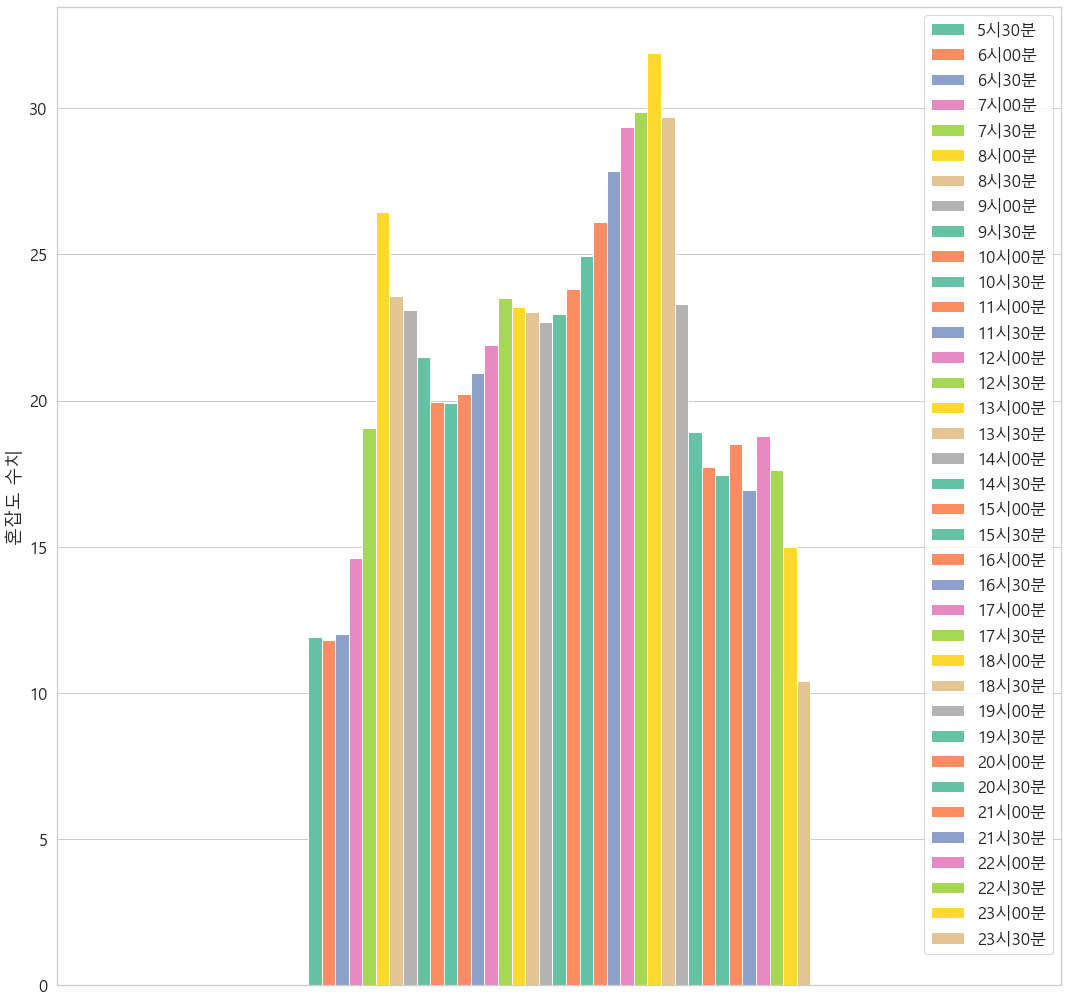

In [6]:
# 전체 혼잡도

crowd_time = crowd.reset_index().groupby('호선').mean()
crowd_time['index'] = 0
# crowd_time.drop(columns=['합 계'], inplace=True)
crowd_time = crowd_time.groupby('index').mean()
crowd_time.plot(kind='bar',figsize=(18,18))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.ylabel('혼잡도 수치');
# plt.savefig('혼잡도.png')